# Imports necessários

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from numpy import mean
from numpy import std
from matplotlib import pyplot

# Import dos dados

## Receitas

In [2]:
dados_receitas = pd.read_csv('03_dados_carga/arquivos_para_carga/dados_receitas.csv', sep=';')
dados_receitas.head()

,COD_RECEITA,DATA,COD_CONTRIBUINTE,VALOR_ARRECADADO,FONTE_DADOS
0,1722010101,2013-01-03,886cd0eabf5a18,185560.68,prefeitura municipal
1,1722010101,2013-01-04,886cd0eabf5a18,8081.80,prefeitura municipal
2,1722010101,2013-01-07,886cd0eabf5a18,4231.39,prefeitura municipal
3,1722010101,2013-01-08,886cd0eabf5a18,10536.53,prefeitura municipal
4,1722010101,2013-01-15,886cd0eabf5a18,103118.27,prefeitura municipal


# Feature Engineering

## Receitas

### Sample dos dados

In [3]:
# Converter a coluna 'DATA' para o tipo datetime
dados_receitas['DATA'] = pd.to_datetime(dados_receitas['DATA'])

# Extrair o ano, mês e dia da coluna 'DATA' como novas features
dados_receitas['ANO'] = dados_receitas['DATA'].dt.year

In [4]:
# Coluna pela qual você deseja amostrar proporcionalmente
coluna_amostragem = 'ANO'

# Porcentagem de amostras desejadas)
porcentagem_amostra = 0.001

# Divida o DataFrame em grupos com base na coluna de amostragem
grupos = dados_receitas.groupby(coluna_amostragem, group_keys=False, sort=False)

# Inicialize listas para armazenar os DataFrames de amostra e de não amostra
amostras = []
nao_amostras = []

# Para cada grupo, aplique o método sample com a porcentagem desejada
for nome_grupo, grupo in grupos:
    grupo_amostra = grupo.sample(frac=porcentagem_amostra)
    
    # Adicione o grupo de amostra à lista de amostras
    amostras.append(grupo_amostra)
    
    # Adicione o grupo de não amostra à lista de não amostras
    grupo_nao_amostra = grupo.drop(grupo_amostra.index)
    nao_amostras.append(grupo_nao_amostra)

# Crie um novo DataFrame contendo todas as amostras
df_amostrado = pd.concat(amostras)

# Crie um novo DataFrame contendo todos os dados que não entraram no sample
df_nao_amostrado = pd.concat(nao_amostras)

In [5]:
df_amostrado['SMA(12)'] = df_amostrado['VALOR_ARRECADADO'].rolling(window=12).mean()
df_amostrado['SMA(6)'] = df_amostrado['VALOR_ARRECADADO'].rolling(window=6).mean()
df_amostrado['SMA(3)'] = df_amostrado['VALOR_ARRECADADO'].rolling(window=2).mean()
df_amostrado['SMA(2)'] = df_amostrado['VALOR_ARRECADADO'].rolling(window=2).mean()
df_amostrado.head()

,COD_RECEITA,DATA,COD_CONTRIBUINTE,VALOR_ARRECADADO,FONTE_DADOS,ANO,SMA(12),SMA(6),SMA(3),SMA(2)
6110,1325000001,2013-07-31,fa2fbf741ea79c,89.31,prefeitura municipal,2013,NaN,NaN,NaN,NaN
4108,1922990001,2013-08-06,1a5c702d84fad2,135.60,prefeitura municipal,2013,NaN,NaN,112.455,112.455
1514,9722010101,2013-06-26,886cd0eabf5a18,-70618.40,prefeitura municipal,2013,NaN,NaN,-35241.400,-35241.400
3991,1220990100,2013-06-27,4a726c99a508e2,1057.66,prefeitura municipal,2013,NaN,NaN,-34780.370,-34780.370
2850,1931110001,2013-10-01,886cd0eabf5a18,861.05,prefeitura municipal,2013,NaN,NaN,959.355,959.355


In [6]:
df_amostrado['lag(12)'] = df_amostrado['VALOR_ARRECADADO'].shift(12)
df_amostrado['lag(6)'] = df_amostrado['VALOR_ARRECADADO'].shift(6)
df_amostrado['lag(4)'] = df_amostrado['VALOR_ARRECADADO'].shift(4)
df_amostrado['lag(3)'] = df_amostrado['VALOR_ARRECADADO'].shift(3)
df_amostrado['lag(2)'] = df_amostrado['VALOR_ARRECADADO'].shift(2)
df_amostrado['lag(1)'] = df_amostrado['VALOR_ARRECADADO'].shift(1)
df_amostrado.head()

,COD_RECEITA,DATA,COD_CONTRIBUINTE,VALOR_ARRECADADO,FONTE_DADOS,ANO,SMA(12),SMA(6),SMA(3),SMA(2),lag(12),lag(6),lag(4),lag(3),lag(2),lag(1)
6110,1325000001,2013-07-31,fa2fbf741ea79c,89.31,prefeitura municipal,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4108,1922990001,2013-08-06,1a5c702d84fad2,135.60,prefeitura municipal,2013,NaN,NaN,112.455,112.455,NaN,NaN,NaN,NaN,NaN,89.31
1514,9722010101,2013-06-26,886cd0eabf5a18,-70618.40,prefeitura municipal,2013,NaN,NaN,-35241.400,-35241.400,NaN,NaN,NaN,NaN,89.31,135.60
3991,1220990100,2013-06-27,4a726c99a508e2,1057.66,prefeitura municipal,2013,NaN,NaN,-34780.370,-34780.370,NaN,NaN,NaN,89.31,135.60,-70618.40
2850,1931110001,2013-10-01,886cd0eabf5a18,861.05,prefeitura municipal,2013,NaN,NaN,959.355,959.355,NaN,NaN,89.31,135.60,-70618.40,1057.66


In [7]:
df_amostrado.dropna(inplace=True)
df_amostrado.head()

,COD_RECEITA,DATA,COD_CONTRIBUINTE,VALOR_ARRECADADO,FONTE_DADOS,ANO,SMA(12),SMA(6),SMA(3),SMA(2),lag(12),lag(6),lag(4),lag(3),lag(2),lag(1)
982,1112043101,2013-04-19,886cd0eabf5a18,43.74,prefeitura municipal,2013,-3975.867500,-782.501667,321.370,321.370,89.31,25475.25,1.72,-32.55,-5309.76,599.00
4423,1112043101,2013-11-07,1a5c702d84fad2,24.67,prefeitura municipal,2013,-3985.111667,-778.863333,34.205,34.205,135.60,2.84,-32.55,-5309.76,599.00,43.74
5295,1112020001,2013-12-10,ef1dbf24acc7f0,1539.69,prefeitura municipal,2013,2028.062500,-522.535000,782.180,782.180,-70618.40,1.72,-5309.76,599.00,43.74,24.67
3792,1922990001,2013-05-02,1a5c702d84fad2,90.40,prefeitura municipal,2013,1947.457500,-502.043333,815.045,815.045,1057.66,-32.55,599.00,43.74,24.67,1539.69
7240,1121310001,2013-05-28,470c93ab945237,191.00,sctrans,2013,1891.620000,414.750000,140.700,140.700,861.05,-5309.76,43.74,24.67,1539.69,90.40


In [8]:
df_amostrado.drop(columns=['COD_RECEITA', 'COD_CONTRIBUINTE', 'FONTE_DADOS', 'ANO'], inplace=True)

In [9]:
df_amostrado['DATA'] = pd.to_datetime(df_amostrado['DATA'])
df_amostrado['DATA'] = df_amostrado['DATA'].map(dt.datetime.toordinal)

### Implementação do modelo

In [10]:
train_size = int(len(df_amostrado) * 0.75)
train_dataset, test_dataset = df_amostrado.iloc[:train_size], df_amostrado.iloc[train_size:]

Dimension of train data:  (1909, 12)
Dimension of test data:  (637, 12)


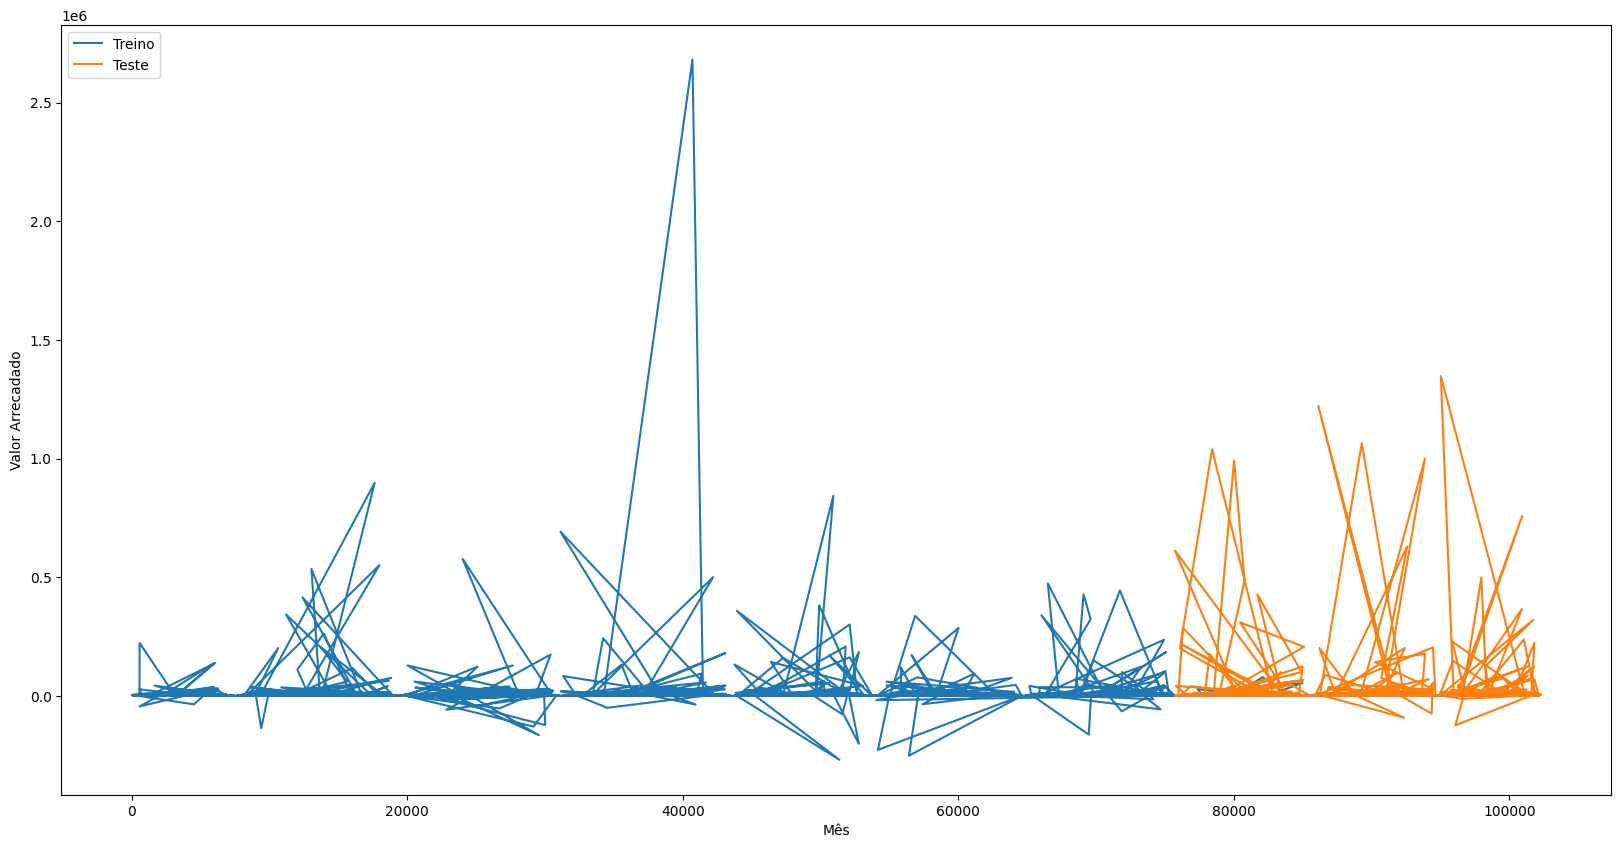

In [11]:
plt.figure(figsize=(20,10))
plt.plot(train_dataset['VALOR_ARRECADADO'])
plt.plot(test_dataset['VALOR_ARRECADADO'])
plt.xlabel('Mês')
plt.ylabel('Valor Arrecadado')
plt.legend(['Treino', 'Teste'], loc='upper left')
print('Dimension of train data: ', train_dataset.shape)
print('Dimension of test data: ', test_dataset.shape)

In [12]:
X_train = train_dataset.drop(['VALOR_ARRECADADO'], axis=1)
y_train = train_dataset.loc[:, ['VALOR_ARRECADADO']]

In [13]:
X_test = test_dataset.drop(['VALOR_ARRECADADO'], axis=1)
y_test = test_dataset.loc[:, ['VALOR_ARRECADADO']]

In [14]:
print('Dimension of X_train data: ', X_train.shape)
print('Dimension of y_train data: ', y_train.shape)
print('Dimension of X_test data: ', X_test.shape)
print('Dimension of y_test data: ', y_test.shape)

Dimension of X_train data:  (1909, 11)
Dimension of y_train data:  (1909, 1)
Dimension of X_test data:  (637, 11)
Dimension of y_test data:  (637, 1)


In [15]:
scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

In [16]:
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(y_train)

In [17]:
train_y_norm = output_scaler.transform(y_train)
train_x_norm = input_scaler.transform(X_train)

In [18]:
test_y_norm = output_scaler.transform(y_test)
test_x_norm = input_scaler.transform(X_test)

In [19]:
print('Dimension of train_y_norm data: ', train_x_norm.shape)
print('Dimension of train_x_norm data: ', train_y_norm.shape)
print('Dimension of test_y_norm data: ', test_x_norm.shape)
print('Dimension of test_x_norm data: ', test_y_norm.shape)

Dimension of train_y_norm data:  (1909, 11)
Dimension of train_x_norm data:  (1909, 1)
Dimension of test_y_norm data:  (637, 11)
Dimension of test_x_norm data:  (637, 1)


In [20]:
X_test = test_x_norm.reshape((test_x_norm.shape[0], 1, test_x_norm.shape[1]))
X_train = train_x_norm.reshape((train_x_norm.shape[0], 1, train_x_norm.shape[1]))
y_test = test_y_norm.reshape((test_y_norm.shape[0], test_y_norm.shape[1], 1))
y_train = train_y_norm.reshape((train_y_norm.shape[0], train_y_norm.shape[1], 1))

Ajuste no modelo com 32, 64 e 128 neurônioss para verficação do mais adequado para a aplicação.

In [ ]:
# Ajustando e validando o modelo
def evaluate_model(X_train, y_train, X_test, y_test, neurons):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units = neurons, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.LSTM(units = neurons))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    # ajustando o modelo
    model.fit(X_train, y_train, epochs=100, batch_size=4, validation_split = 0.2, shuffle=False)
    # avaliando o modelo
    loss = model.evaluate(X_test, y_test, verbose=0, batch_size=4)
    return loss

# Resumindo as pontuações
def summarize_results(scores, params):
    print(scores, params)
    # resumindo a média e desvio padrão
    for i in range(len(scores)):
        m, s = mean(scores[i]), std(scores[i])
        print(f'Param={params[i]}, Mean={m:.3f}:, Std={s:.3f}')
    # boxplot das pontuações
    pyplot.boxplot(scores, labels=params)
    pyplot.savefig('figura[0].png')

# Rodando um experimento
def run_experiment(params, repeats = 10):
    # Testando cada parâmetro
    all_scores = list()
    for p in params:
        # repetindo o experimento
        scores = list()
        for r in range(repeats):
            score = evaluate_model(X_train, y_train, X_test, y_test, p)
            score = score * 100.0
            scores.append(score)
            print(f'>Neurons={p}, Score={score}')
        all_scores.append(scores)
    # resumindo os resultados
    summarize_results(all_scores, params)

# Rodando o experimento
n_params = [32, 64, 128]
run_experiment(n_params)

In [ ]:
# Ajustando e validando o modelo
def evaluate_model(X_train, y_train, X_test, y_test, neurons):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units = neurons, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.LSTM(units = neurons))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    # ajustando o modelo
    model.fit(X_train, y_train, epochs=100, batch_size=4, validation_split = 0.2, shuffle=False)
    # avaliando o modelo
    loss = model.evaluate(X_test, y_test, verbose=0, batch_size=4)
    return loss

# Resumindo as pontuações
def summarize_results(scores, params):
    print(scores, params)
    # resumindo a média e desvio padrão
    for i in range(len(scores)):
        m, s = mean(scores[i]), std(scores[i])
        print(f'Param={params[i]}, Mean={m:.3f}:, Std={s:.3f}')
    # boxplot das pontuações
    pyplot.boxplot(scores, labels=params)
    pyplot.savefig('figura[0].png')

# Rodando um experimento
def run_experiment(params, repeats = 10):
    # Testando cada parâmetro
    all_scores = list()
    for p in params:
        # repetindo o experimento
        scores = list()
        for r in range(repeats):
            score = evaluate_model(X_train, y_train, X_test, y_test, p)
            score = score * 100.0
            scores.append(score)
            print(f'>Neurons={p}, Score={score}')
        all_scores.append(scores)
    # resumindo os resultados
    summarize_results(all_scores, params)

# Rodando o experimento
n_params = [60, 65, 70, 75, 80, 85, 90]
run_experiment(n_params)

Ajuste de modelo com tamanho do lote 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11 e 12, para verificação do mais adequado para a aplicação.

In [ ]:
# Ajustando e validando o modelo
def evaluate_model(X_train, y_train, X_test, y_test, batch_size):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units = 80, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.LSTM(units = 80))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    # ajustando o modelo
    model.fit(X_train, y_train, epochs=50, batch_size=batch_size, validation_split = 0.2, shuffle=False)
    # avaliando o modelo
    loss = model.evaluate(X_test, y_test, verbose=0, batch_size=batch_size)
    return loss

# Resumindo as pontuações
def summarize_results(scores, params):
    print(scores, params)
    # resumindo a média e desvio padrão
    for i in range(len(scores)):
        m, s = mean(scores[i]), std(scores[i])
        print(f'Param={params[i]}, Mean={m:.3f}:, Std={s:.3f}')
    # boxplot das pontuações
    pyplot.boxplot(scores, labels=params)
    pyplot.savefig('figura[0].png')

# Rodando um experimento
def run_experiment(params, repeats = 10):
    # Testando cada parâmetro
    all_scores = list()
    for p in params:
        # repetindo o experimento
        scores = list()
        for r in range(repeats):
            score = evaluate_model(X_train, y_train, X_test, y_test, p)
            score = score * 100.0
            scores.append(score)
            print(f'>p={p}: {r+1}, Score={score}')
        all_scores.append(scores)
    # resumindo os resultados
    summarize_results(all_scores, params)

# Rodando o experimento
n_params = np.arange(1, 13)
run_experiment(n_params)

Ajuste no modelo com diluição - dropout - 0.05, 0.1, 0.2, 0.3, para verficação do mais adequado para a aplicação.

In [ ]:
# Ajustando e validando o modelo
def evaluate_model(X_train, y_train, X_test, y_test, dropout):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units = 80, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.LSTM(units = 80))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    # ajustando o modelo
    model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split = 0.2, shuffle=False)
    # avaliando o modelo
    loss = model.evaluate(X_test, y_test, verbose=0, batch_size=5)
    return loss

# Resumindo as pontuações
def summarize_results(scores, params):
    print(scores, params)
    # resumindo a média e desvio padrão
    for i in range(len(scores)):
        m, s = mean(scores[i]), std(scores[i])
        print(f'Param={params[i]}, Mean={m:.3f}:, Std={s:.3f}')
    # boxplot das pontuações
    pyplot.boxplot(scores, labels=params)
    pyplot.savefig('figura[0].png')

# Rodando um experimento
def run_experiment(params, repeats = 10):
    # Testando cada parâmetro
    all_scores = list()
    for p in params:
        # repetindo o experimento
        scores = list()
        for r in range(repeats):
            score = evaluate_model(X_train, y_train, X_test, y_test, p)
            score = score
            scores.append(score)
            print(f'>p={p}: {r+1}, Score={score}')
        all_scores.append(scores)
    # resumindo os resultados
    summarize_results(all_scores, params)

# Rodando o experimento
n_params = [0.05, 0.1, 0.2, 0.3]
run_experiment(n_params)

Ajustando o modelo com os padrões mais adequados visualizados nos testes anteriores.

In [ ]:
# Ajustando e validando o modelo
def evaluate_model(X_train, y_train, X_test, y_test):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units = 80, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(0.05))
    model.add(tf.keras.layers.LSTM(units = 80))
    model.add(tf.keras.layers.Dropout(0.05))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    # ajustando o modelo
    model.fit(X_train, y_train, epochs=150, batch_size=5, validation_split = 0.2, shuffle=False)
    # avaliando o modelo
    loss = model.evaluate(X_test, y_test, verbose=0, batch_size=5)
    return loss

# Resumindo as pontuações
def summarize_results(scores):
    print(scores)
    m, s = mean(scores[i]), std(scores[i])
    print(f'Loss: Mean = {m:.3f}, Std = {s:.3f}')

# Rodando um experimento
def run_experiment(repeats = 10):
    # repetindo o experimento
    scores = list()
    for r in range(repeats):
        score = evaluate_model(X_train, y_train, X_test, y_test)
        score = score
        scores.append(score)
        print(f'>{r+1}: Score={score}')
    # resumindo os resultados
    summarize_results(all_scores, params)

# Rodando o experimento
run_experiment(n_params)